I'll be using this file primarily for the second exploration in my thesis, relating to people

In [132]:
# Author: Alison Silldorff
# File: analysis_work_2.ipynb
# Date: 3/30/25
# Purpose: Use SQL database to analyze data.
%matplotlib inline

import mysql.connector
from mysql.connector import Error
import json
from datetime import datetime
import csv
import unicodedata
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import seaborn.objects as so
import matplotlib.ticker as ticker

password = open("C:\\Users\\12676\\mysqlinfo", 'r').read()

In [68]:
connection = mysql.connector.connect(host='localhost', 
                                        database='shows_db',
                                        user='root',
                                        password=password, use_pure=True, buffered=True)

In [69]:
def take_year(date_elem):
    return date_elem.year

query1 = "SELECT * FROM person"
person_df = pd.read_sql_query(query1, con=connection)
person_df['birth_date'] = person_df['birth_date'].apply(pd.to_datetime, errors="coerce")
person_df['birth_year'] = person_df['birth_date'].apply(take_year)
person_df.fillna('')

C:\Users\12676\AppData\Local\Temp\ipykernel_17844\2278713141.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  person_df = pd.read_sql_query(query1, con=connection)


,person_id,name,birth_date,death_date,birth_place,death_place,gender,ibdb_url,tmdb_url,tmdb_popularity,birth_year
0,0000000000,Karen Olivo,1976-08-07,,"New York, New York, USA",,Female,/broadway-cast-staff/karen-olivo-98858,,,1976.0
1,0000000001,Aaron Tveit,1983-10-21,,"Middletown, New York, USA",,Male,/broadway-cast-staff/aaron-tveit-434605,themoviedb.org/person/143425,1.2525,1983.0
2,0000000002,Danny Burstein,1964-06-16,,"New York, New York, USA",,Male,/broadway-cast-staff/danny-burstein-69936,themoviedb.org/person/7428,1.2634,1964.0
3,0000000003,Robyn Hurder,1982-01-01,,"Nashua, New Hampshire, USA",,Female,/broadway-cast-staff/robyn-hurder-393748,,,1982.0
4,0000000004,Tam Mutu,1978-04-30,,"Hastings, ENGLAND",,Male,/broadway-cast-staff/tam-mutu-491296,,,1978.0
...,...,...,...,...,...,...,...,...,...,...,...
69459,0000070706,Tomu Ranju,1975-08-12,,,,Female,,themoviedb.org/person/1924413,0.0387,1975.0
69460,0000070707,Kairi Hokushō,NaT,,,,Female,,themoviedb.org/person/2706182,0.0306,
69461,0000070708,Toki Irisu,NaT,,,,Female,,themoviedb.org/person/3936620,0.0239,
69462,0000070709,Hiroki Nanami,NaT,,,,Female,,themoviedb.org/person/2409447,1.8085,


In [123]:
def take_year(date_elem):
    return date_elem.year

query2 = "SELECT * FROM work_person"
work_person_df = pd.read_sql_query(query2, con=connection)
work_person_df.fillna('')

query3 = "SELECT * FROM work"
work_df = pd.read_sql_query(query3, con=connection)
print(work_df)
# work_df['year'] = work_df['year'].apply(pd.to_datetime, errors="coerce")
# work_df['year'] = work_df['year'].apply(take_year)
work_df.fillna('')

C:\Users\12676\AppData\Local\Temp\ipykernel_17844\2928829550.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  work_person_df = pd.read_sql_query(query2, con=connection)


       work_id property_id type_id  \
0     00000011        0000      11   
1     00010011        0001      11   
2     00010021        0001      21   
3     00020011        0002      11   
4     00030011        0003      11   
...        ...         ...     ...   
3709  25810011        2581      11   
3710  25820011        2582      11   
3711  25830011        2583      11   
3712  25840011        2584      11   
3713  25850011        2585      11   

                                             title  year  
0                    'Round New York in 80 Minutes  1899  
1     "It's a Bird...It's a Plane...It's Superman"  1966  
2        It's a Bird, It's a Plane, It's Superman!  1975  
3                         (From) Broadway to Paris  1912  
4                                  [title of show]  2008  
...                                            ...   ...  
3709        The Best Little Whorehouse Goes Public  1994  
3710                                Fine and Dandy  1930  
3711        

C:\Users\12676\AppData\Local\Temp\ipykernel_17844\2928829550.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  work_df = pd.read_sql_query(query3, con=connection)


,work_id,property_id,type_id,title,year
0,00000011,0000,11,'Round New York in 80 Minutes,1899
1,00010011,0001,11,"""It's a Bird...It's a Plane...It's Superman""",1966
2,00010021,0001,21,"It's a Bird, It's a Plane, It's Superman!",1975
3,00020011,0002,11,(From) Broadway to Paris,1912
4,00030011,0003,11,[title of show],2008
...,...,...,...,...,...
3709,25810011,2581,11,The Best Little Whorehouse Goes Public,1994
3710,25820011,2582,11,Fine and Dandy,1930
3711,25830011,2583,11,The Dancing Girl,1923
3712,25840011,2584,11,The Passing Show of 1922,1922


I need to merge work_person_df with data on the release year/opening date of the production.

In [124]:
# remember you can't re-run this without re-setting work_person_df otherwise it keeps merging with itself
work_person_df = pd.merge(work_person_df, work_df, on='work_id', how='inner')[['work_person_id', 'person_id', 'work_id', 'name', 'property_id_x',
       'type_id_x', 'role', 'song', 'ibdb_url', 'tmdb_url', 'title', 'year']]
work_person_df.columns = ['work_person_id', 'person_id', 'work_id', 'name', 'property_id',
       'type_id', 'role', 'song', 'ibdb_url', 'tmdb_url', 'title', 'year']

stage_wp_df = work_person_df[work_person_df['type_id'].isin(['11', '12', '13', '14'])]
screen_wp_df = work_person_df[work_person_df['type_id'].isin(['21', '22', '23', '24'])]


Let's add the year of a person's first and last credit to person_df

In [59]:
missing = set()

for key, row in work_person_df.iterrows():
    if pd.isna(row['year']):
        missing.add(row['work_id'])
        #print(row['work_person_id'])

print(missing)

set()


For stage and screen:

In [111]:
first_wp_df = work_person_df.loc[work_person_df.groupby('person_id')['year'].idxmin()]
last_wp_df = work_person_df.loc[work_person_df.groupby('person_id')['year'].idxmax()]


new_person_df = pd.merge(person_df, first_wp_df, on='person_id', how='inner')[['person_id', 'name_x', 'birth_date', 'death_date', 'birth_place',
       'death_place', 'gender', 'ibdb_url_x', 'tmdb_url_x', 'tmdb_popularity',
       'birth_year', 'work_id', 'property_id',
       'type_id', 'role', 'song', 'title', 'year']]
new_person_df.columns = ['person_id', 'name_x', 'birth_date', 'death_date', 'birth_place',
       'death_place', 'gender', 'ibdb_url', 'tmdb_url', 'tmdb_popularity',
       'birth_year', 'first_work_id', 'first_property_id','first_type_id', 'first_role', 'first_song', 'first_title', 'first_year']
new_person_df = pd.merge(new_person_df, last_wp_df, on='person_id', how='inner')[['person_id', 'name_x', 'birth_date', 'death_date', 'birth_place',
       'death_place', 'gender', 'ibdb_url_x', 'tmdb_url_x', 'tmdb_popularity',
       'birth_year', 'first_work_id', 'first_property_id', 'first_type_id',
       'first_role', 'first_song', 'first_title', 'first_year',
       'work_id','property_id', 'type_id', 'role', 'song', 'title', 'year']]
new_person_df.columns = ['person_id', 'name', 'birth_date', 'death_date', 'birth_place',
       'death_place', 'gender', 'ibdb_url', 'tmdb_url', 'tmdb_popularity',
       'birth_year', 'first_work_id', 'first_property_id', 'first_type_id',
       'first_role', 'first_song', 'first_title', 'first_year',
       'last_work_id','last_property_id', 'last_type_id', 'last_role', 'last_song', 'last_title', 'last_year']

new_person_df['career_length'] = new_person_df['last_year']-new_person_df['first_year']
new_person_df

,person_id,name,birth_date,death_date,birth_place,death_place,gender,ibdb_url,tmdb_url,tmdb_popularity,...,first_title,first_year,last_work_id,last_property_id,last_type_id,last_role,last_song,last_title,last_year,career_length
0,0000000000,Karen Olivo,1976-08-07,,"New York, New York, USA",,Female,/broadway-cast-staff/karen-olivo-98858,None,NaN,...,Brooklyn,2004,12390011,1239,11,acting,None,Moulin Rouge! The Musical,2019,15
1,0000000001,Aaron Tveit,1983-10-21,,"Middletown, New York, USA",,Male,/broadway-cast-staff/aaron-tveit-434605,themoviedb.org/person/143425,1.2525,...,Next To Normal,2009,12390011,1239,11,acting,None,Moulin Rouge! The Musical,2019,10
2,0000000002,Danny Burstein,1964-06-16,,"New York, New York, USA",,Male,/broadway-cast-staff/danny-burstein-69936,themoviedb.org/person/7428,1.2634,...,The Drowsy Chaperone,2006,06950112,0695,12,acting,None,Gypsy,2024,18
3,0000000003,Robyn Hurder,1982-01-01,,"Nashua, New Hampshire, USA",,Female,/broadway-cast-staff/robyn-hurder-393748,None,NaN,...,Chitty Chitty Bang Bang,2005,16390011,1639,11,acting,None,Smash,2025,20
4,0000000004,Tam Mutu,1978-04-30,,"Hastings, ENGLAND",,Male,/broadway-cast-staff/tam-mutu-491296,None,NaN,...,Doctor Zhivago,2015,12390011,1239,11,acting,None,Moulin Rouge! The Musical,2019,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63924,0000070706,Tomu Ranju,1975-08-12,,,None,Female,None,themoviedb.org/person/1924413,0.0387,...,Singin' in the Rain,2008,16300123,1630,23,actor,None,Singin' in the Rain,2008,0
63925,0000070707,Kairi Hokushō,NaT,,,None,Female,None,themoviedb.org/person/2706182,0.0306,...,Singin' in the Rain,2008,16300123,1630,23,actor,None,Singin' in the Rain,2008,0
63926,0000070708,Toki Irisu,NaT,,,None,Female,None,themoviedb.org/person/3936620,0.0239,...,Singin' in the Rain,2008,16300123,1630,23,actor,None,Singin' in the Rain,2008,0
63927,0000070709,Hiroki Nanami,NaT,,,None,Female,None,themoviedb.org/person/2409447,1.8085,...,Singin' in the Rain,2008,16300123,1630,23,actor,None,Singin' in the Rain,2008,0


For stage only:

In [125]:
st_first_wp_df = stage_wp_df.loc[stage_wp_df.groupby('person_id')['year'].idxmin()]
st_last_wp_df = stage_wp_df.loc[stage_wp_df.groupby('person_id')['year'].idxmax()]


st_new_person_df = pd.merge(person_df, st_first_wp_df, on='person_id', how='inner')[['person_id', 'name_x', 'birth_date', 'death_date', 'birth_place',
       'death_place', 'gender', 'ibdb_url_x', 'tmdb_url_x', 'tmdb_popularity',
       'birth_year', 'work_id', 'property_id',
       'type_id', 'role', 'song', 'title', 'year']]
st_new_person_df.columns = ['person_id', 'name_x', 'birth_date', 'death_date', 'birth_place',
       'death_place', 'gender', 'ibdb_url', 'tmdb_url', 'tmdb_popularity',
       'birth_year', 'first_work_id', 'first_property_id','first_type_id', 'first_role', 'first_song', 'first_title', 'first_year']
st_new_person_df = pd.merge(st_new_person_df, st_last_wp_df, on='person_id', how='inner')[['person_id', 'name_x', 'birth_date', 'death_date', 'birth_place',
       'death_place', 'gender', 'ibdb_url_x', 'tmdb_url_x', 'tmdb_popularity',
       'birth_year', 'first_work_id', 'first_property_id', 'first_type_id',
       'first_role', 'first_song', 'first_title', 'first_year',
       'work_id','property_id', 'type_id', 'role', 'song', 'title', 'year']]
st_new_person_df.columns = ['person_id', 'name', 'birth_date', 'death_date', 'birth_place',
       'death_place', 'gender', 'ibdb_url', 'tmdb_url', 'tmdb_popularity',
       'birth_year', 'first_work_id', 'first_property_id', 'first_type_id',
       'first_role', 'first_song', 'first_title', 'first_year',
       'last_work_id','last_property_id', 'last_type_id', 'last_role', 'last_song', 'last_title', 'last_year']

st_new_person_df['career_length'] = st_new_person_df['last_year']-st_new_person_df['first_year']
st_new_person_df

,person_id,name,birth_date,death_date,birth_place,death_place,gender,ibdb_url,tmdb_url,tmdb_popularity,...,first_title,first_year,last_work_id,last_property_id,last_type_id,last_role,last_song,last_title,last_year,career_length
0,0000000000,Karen Olivo,1976-08-07,,"New York, New York, USA",,Female,/broadway-cast-staff/karen-olivo-98858,None,NaN,...,Brooklyn,2004,12390011,1239,11,acting,None,Moulin Rouge! The Musical,2019,15
1,0000000001,Aaron Tveit,1983-10-21,,"Middletown, New York, USA",,Male,/broadway-cast-staff/aaron-tveit-434605,themoviedb.org/person/143425,1.2525,...,Next To Normal,2009,12390011,1239,11,acting,None,Moulin Rouge! The Musical,2019,10
2,0000000002,Danny Burstein,1964-06-16,,"New York, New York, USA",,Male,/broadway-cast-staff/danny-burstein-69936,themoviedb.org/person/7428,1.2634,...,The Drowsy Chaperone,2006,06950112,0695,12,acting,None,Gypsy,2024,18
3,0000000003,Robyn Hurder,1982-01-01,,"Nashua, New Hampshire, USA",,Female,/broadway-cast-staff/robyn-hurder-393748,None,NaN,...,Chitty Chitty Bang Bang,2005,16390011,1639,11,acting,None,Smash,2025,20
4,0000000004,Tam Mutu,1978-04-30,,"Hastings, ENGLAND",,Male,/broadway-cast-staff/tam-mutu-491296,None,NaN,...,Doctor Zhivago,2015,12390011,1239,11,acting,None,Moulin Rouge! The Musical,2019,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50426,0000050428,Bettina Liebowitz Knapp,NaT,,,,Female,/broadway-cast-staff/bettina-liebowitz-knapp-1...,None,NaN,...,Tovarich,1963,24190011,2419,11,translation,,Tovarich,1963,0
50427,0000050429,Anthony Drewe,1961-03-22,,"Berkshire, ENGLAND",,Male,/broadway-cast-staff/anthony-drewe-434333,None,NaN,...,Mary Poppins,2006,11670011,1167,11,new songs additional music and lyrics,,Mary Poppins,2006,0
50428,0000050430,Bob Wynn,1932-01-01,2013-12-12,"St. Louis, Missouri, USA","Calabasas, California, USA",Male,/broadway-cast-staff/bob-wynn-78404,None,NaN,...,Grind,1985,06910011,0691,11,idea,,Grind,1985,0
50429,0000050431,Alan Handley,1912-03-11,1990-01-05,"Indiana, USA","Los Angeles, California, USA",Male,/broadway-cast-staff/alan-handley-44003,None,NaN,...,Grind,1985,06910011,0691,11,idea,,Grind,1985,0


For screen only:

In [126]:
sc_first_wp_df = screen_wp_df.loc[screen_wp_df.groupby('person_id')['year'].idxmin()]
sc_last_wp_df = screen_wp_df.loc[screen_wp_df.groupby('person_id')['year'].idxmax()]


sc_new_person_df = pd.merge(person_df, sc_first_wp_df, on='person_id', how='inner')[['person_id', 'name_x', 'birth_date', 'death_date', 'birth_place',
       'death_place', 'gender', 'ibdb_url_x', 'tmdb_url_x', 'tmdb_popularity',
       'birth_year', 'work_id', 'property_id',
       'type_id', 'role', 'song', 'title', 'year']]
sc_new_person_df.columns = ['person_id', 'name_x', 'birth_date', 'death_date', 'birth_place',
       'death_place', 'gender', 'ibdb_url', 'tmdb_url', 'tmdb_popularity',
       'birth_year', 'first_work_id', 'first_property_id','first_type_id', 'first_role', 'first_song', 'first_title', 'first_year']
sc_new_person_df = pd.merge(sc_new_person_df, sc_last_wp_df, on='person_id', how='inner')[['person_id', 'name_x', 'birth_date', 'death_date', 'birth_place',
       'death_place', 'gender', 'ibdb_url_x', 'tmdb_url_x', 'tmdb_popularity',
       'birth_year', 'first_work_id', 'first_property_id', 'first_type_id',
       'first_role', 'first_song', 'first_title', 'first_year',
       'work_id','property_id', 'type_id', 'role', 'song', 'title', 'year']]
sc_new_person_df.columns = ['person_id', 'name', 'birth_date', 'death_date', 'birth_place',
       'death_place', 'gender', 'ibdb_url', 'tmdb_url', 'tmdb_popularity',
       'birth_year', 'first_work_id', 'first_property_id', 'first_type_id',
       'first_role', 'first_song', 'first_title', 'first_year',
       'last_work_id','last_property_id', 'last_type_id', 'last_role', 'last_song', 'last_title', 'last_year']

sc_new_person_df['career_length'] = sc_new_person_df['last_year']-sc_new_person_df['first_year']
sc_new_person_df

,person_id,name,birth_date,death_date,birth_place,death_place,gender,ibdb_url,tmdb_url,tmdb_popularity,...,first_title,first_year,last_work_id,last_property_id,last_type_id,last_role,last_song,last_title,last_year,career_length
0,0000000001,Aaron Tveit,1983-10-21,,"Middletown, New York, USA",,Male,/broadway-cast-staff/aaron-tveit-434605,themoviedb.org/person/143425,1.2525,...,Grease Live,2016,06860124,0686,24,actor,None,Grease Live,2016,0
1,0000000002,Danny Burstein,1964-06-16,,"New York, New York, USA",,Male,/broadway-cast-staff/danny-burstein-69936,themoviedb.org/person/7428,1.2634,...,South Pacific,2010,16690322,1669,22,actor,None,South Pacific,2010,0
2,0000000027,Billy Porter,1969-09-21,,"Pittsburgh, Pennsylvania, USA",,Male,/broadway-cast-staff/billy-porter-74959,themoviedb.org/person/88966,0.7850,...,Anastasia,1997,01560021,0156,21,actor,None,Anastasia,1997,0
3,0000000029,Annaleigh Ashford,1985-06-25,,"Denver, Colorado, USA",,Female,/broadway-cast-staff/annaleigh-ashford-453747,themoviedb.org/person/120831,1.0235,...,Frozen,2013,06170021,0617,21,actor,None,Frozen,2013,0
4,0000000056,Beth Leavel,1955-11-01,,"Raleigh, North Carolina, USA",,Female,/broadway-cast-staff/beth-leavel-70613,themoviedb.org/person/1237381,0.3530,...,42nd Street,1986,00140022,0014,22,actor,None,42nd Street,1986,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14694,0000070706,Tomu Ranju,1975-08-12,,,None,Female,None,themoviedb.org/person/1924413,0.0387,...,Singin' in the Rain,2008,16300123,1630,23,actor,None,Singin' in the Rain,2008,0
14695,0000070707,Kairi Hokushō,NaT,,,None,Female,None,themoviedb.org/person/2706182,0.0306,...,Singin' in the Rain,2008,16300123,1630,23,actor,None,Singin' in the Rain,2008,0
14696,0000070708,Toki Irisu,NaT,,,None,Female,None,themoviedb.org/person/3936620,0.0239,...,Singin' in the Rain,2008,16300123,1630,23,actor,None,Singin' in the Rain,2008,0
14697,0000070709,Hiroki Nanami,NaT,,,None,Female,None,themoviedb.org/person/2409447,1.8085,...,Singin' in the Rain,2008,16300123,1630,23,actor,None,Singin' in the Rain,2008,0


In [99]:
print(first_wp_df['year'])

16282     2004
69954     2009
101922    2006
22016     2005
26245     2015
          ... 
88377     2008
88378     2008
88379     2008
88380     2008
88381     2008
Name: year, Length: 63930, dtype: int64


Let's make a scatterplot of first vs last thing.

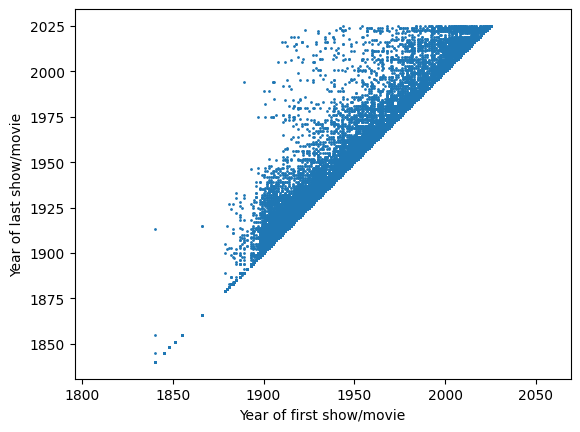

In [102]:
plt.scatter(new_person_df['first_year'], new_person_df['last_year'], s=1)
plt.axis('equal')
plt.xlabel('Year of first show/movie')
plt.ylabel('Year of last show/movie')
plt.show()

Let's instead look at career lengths

,career_length,count
1,1,2265
2,2,1993
3,3,1545
4,4,1217
5,5,1042
...,...,...
98,101,1
99,102,1
100,104,2
101,105,1


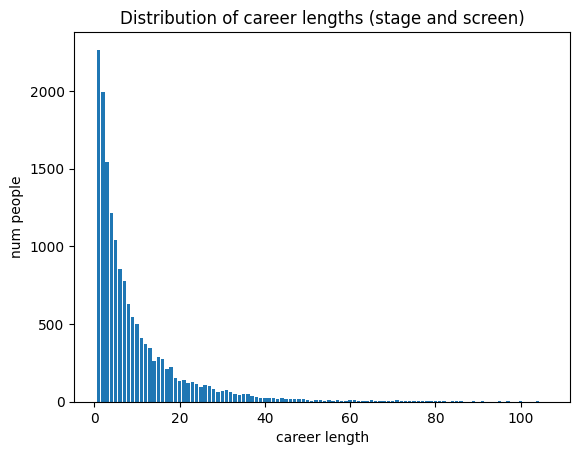

In [ ]:
career_counts = new_person_df['career_length'].value_counts().sort_values().sort_index().reset_index()
career_counts=career_counts.drop(index=0)
plt.bar(career_counts['career_length'], career_counts['count'])
plt.xlabel('career length')
plt.ylabel('num people')
plt.title('Distribution of career lengths (stage and screen)')
#career_counts['career_length'].max()

Text(0.5, 1.0, 'Distribution of career lengths (screen)')

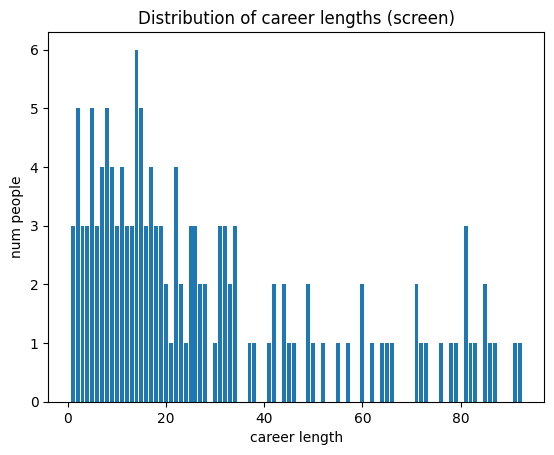

In [134]:
sc_career_counts = sc_new_person_df['career_length'].value_counts().sort_values().sort_index().reset_index()
sc_career_counts=sc_career_counts.drop(index=0)
plt.bar(sc_career_counts['career_length'], sc_career_counts['count'])
plt.xlabel('career length')
plt.ylabel('num people')
plt.title('Distribution of career lengths (screen)')

Text(0.5, 1.0, 'Distribution of career lengths (stage)')

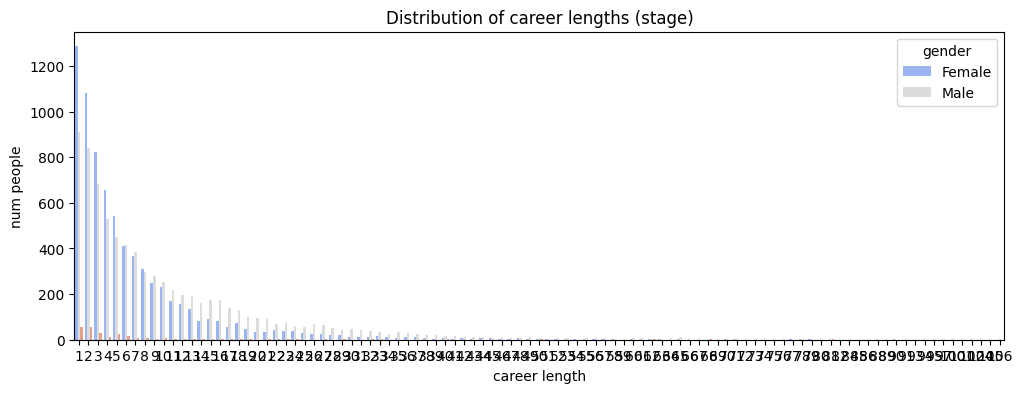

In [143]:
# melted_career_counts = st_new_person_df.melt(id_vars='gender', var_name='gender', value_name='year')
# print(melted_career_counts)

st_career_counts = st_new_person_df['career_length'].value_counts().sort_values().sort_index().reset_index()
st_career_counts=st_career_counts.drop(index=0)

filtered_stnpdf = st_new_person_df[st_new_person_df['career_length']!=0]
fig, ax = plt.subplots(figsize=(12, 4))
sns.countplot(data=filtered_stnpdf, x="career_length", hue="gender", palette="coolwarm", ax=ax)

#plt.bar(st_career_counts['career_length'], st_career_counts['count'])
plt.xlabel('career length')
plt.ylabel('num people')
plt.title('Distribution of career lengths (stage)')

Let's try to look at number of shows in a career. And then after that we can get to distribution of shows over a life.

In [147]:
stage_creds_count = stage_wp_df['person_id'].value_counts().reset_index()
st_person_df2 = pd.merge(person_df, stage_creds_count, on='person_id', how='inner')
st_person_df2.columns = ['person_id', 'name', 'birth_date', 'death_date', 'birth_place',
       'death_place', 'gender', 'ibdb_url', 'tmdb_url', 'tmdb_popularity',
       'birth_year', 'stage_creds_count']

In [153]:
st_person_df2

,person_id,name,birth_date,death_date,birth_place,death_place,gender,ibdb_url,tmdb_url,tmdb_popularity,birth_year,stage_creds_count
0,0000000000,Karen Olivo,1976-08-07,,"New York, New York, USA",,Female,/broadway-cast-staff/karen-olivo-98858,None,NaN,1976.0,4
1,0000000001,Aaron Tveit,1983-10-21,,"Middletown, New York, USA",,Male,/broadway-cast-staff/aaron-tveit-434605,themoviedb.org/person/143425,1.2525,1983.0,3
2,0000000002,Danny Burstein,1964-06-16,,"New York, New York, USA",,Male,/broadway-cast-staff/danny-burstein-69936,themoviedb.org/person/7428,1.2634,1964.0,8
3,0000000003,Robyn Hurder,1982-01-01,,"Nashua, New Hampshire, USA",,Female,/broadway-cast-staff/robyn-hurder-393748,None,NaN,1982.0,7
4,0000000004,Tam Mutu,1978-04-30,,"Hastings, ENGLAND",,Male,/broadway-cast-staff/tam-mutu-491296,None,NaN,1978.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
50426,0000050428,Bettina Liebowitz Knapp,NaT,,,,Female,/broadway-cast-staff/bettina-liebowitz-knapp-1...,None,NaN,NaN,1
50427,0000050429,Anthony Drewe,1961-03-22,,"Berkshire, ENGLAND",,Male,/broadway-cast-staff/anthony-drewe-434333,None,NaN,1961.0,1
50428,0000050430,Bob Wynn,1932-01-01,2013-12-12,"St. Louis, Missouri, USA","Calabasas, California, USA",Male,/broadway-cast-staff/bob-wynn-78404,None,NaN,1932.0,1
50429,0000050431,Alan Handley,1912-03-11,1990-01-05,"Indiana, USA","Los Angeles, California, USA",Male,/broadway-cast-staff/alan-handley-44003,None,NaN,1912.0,1


C:\Users\12676\AppData\Local\Temp\ipykernel_17844\631921294.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=st_person_df2, x="stage_creds_count", palette="coolwarm", ax=ax)


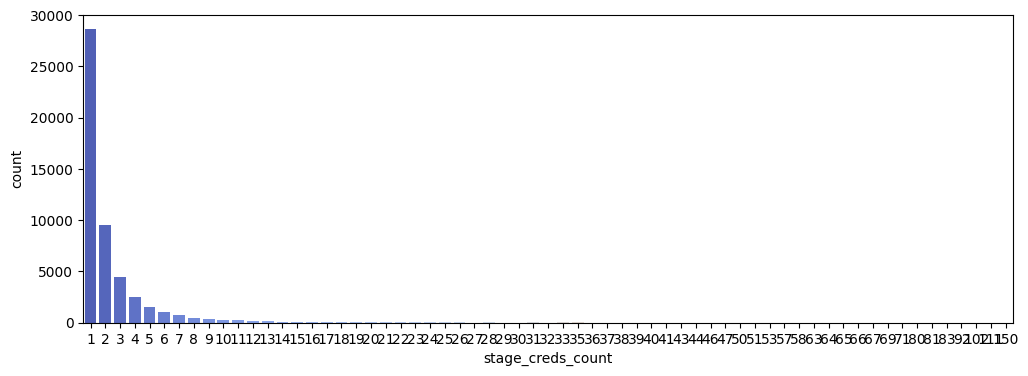

In [ ]:
st_person_df2['stage_creds_count'].value_counts()

fig, ax = plt.subplots(figsize=(12, 4))
sns.countplot(data=st_person_df2, x="stage_creds_count", palette="coolwarm", ax=ax)
plt.show()